In [124]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Little mice

Aging phenotypes ameliorated by intervention

In [125]:
# load data from little mice where I had already computed 95% CIs of Cohen's d values
# this is covering the parameters analyzed by ANOVA as well as the ones analyzed by ART


df = pd.read_csv('Statistics_2-wayANOVAs_non-parametric_ART_FisherLSD_ghrhr_allParameters_CORRECTED_withZstatForCohenDcomparison.csv', sep=';')
df['ci_cohen.d_genotype_inYoung_range'] = df['ci_cohen.d_genotype_inYoung_upper'] - df['ci_cohen.d_genotype_inYoung_lower']
df['ci_cohen.d_genotype_inOld_range'] = df['ci_cohen.d_genotype_inOld_upper'] - df['ci_cohen.d_genotype_inOld_lower']

# select only subset of parameters
df = df[(df.aov_p_age < 0.05) & 
                    ( (df.aov_p_geno < 0.05) | 
                     (df.aov_p_genoXage < 0.05) )].sort_values('aov_p_genoXage', ascending=False)

# filter for phenotypes where age and geno effects are in opposing directions
df = df[(df['cohen.d_age_inControl'] * df['cohen.d_genotype_inOld'])  < 0] 

# mark whether 'anti-aging' genotype effect is greater in young or old group
df.loc[((df['cohen.d_age_inControl'] * df['cohen.d_genotype_inOld'])  < 0) & 
       ((df['cohen.d_age_inControl'] * df['cohen.d_genotype_inYoung'])  < (df['cohen.d_age_inControl'] * df['cohen.d_genotype_inOld'])) &
       (df['p_cohen.d_genotype_inOld_vs_cohen.d_genotype_inYoung'] < 0.05), 
       'anti_aging_greater_in'] = 'young'


# mark whether 'anti-aging' genotype effect is greater in young or old group; based on Cohen's d comparison
df.loc[((df['cohen.d_age_inControl'] * df['cohen.d_genotype_inOld'])  < 0) & 
       ((df['cohen.d_age_inControl'] * df['cohen.d_genotype_inYoung']) > (df['cohen.d_age_inControl'] * df['cohen.d_genotype_inOld'])) &
       (df['p_cohen.d_genotype_inOld_vs_cohen.d_genotype_inYoung'] < 0.05), 
       'anti_aging_greater_in'] = 'old'

# mark whether 'anti-aging' genotype effect is greater in young or old group, based on Cohen's d comparison
df.loc[((df['cohen.d_age_inControl'] * df['cohen.d_genotype_inOld'])  < 0) & 
       ((df['cohen.d_age_inControl'] * df['cohen.d_genotype_inYoung'])  < (df['cohen.d_age_inControl'] * df['cohen.d_genotype_inOld'])) &
       (df['p_cohen.d_genotype_inOld_vs_cohen.d_genotype_inYoung'] < 0.05), 
       'anti_aging_greater_in'] = 'young'


df_amel = df.copy()

df.loc[(df.anti_aging_greater_in == 'old') |  (df.anti_aging_greater_in == 'young'), 
       ['phenotype', 'p_cohen.d_genotype_inOld_vs_cohen.d_genotype_inYoung', 'anti_aging_greater_in', 'cohen.d_age_inControl', 'cohen.d_genotype_inYoung', 'cohen.d_genotype_inOld']]

#df.head()

,phenotype,p_cohen.d_genotype_inOld_vs_cohen.d_genotype_inYoung,anti_aging_greater_in,cohen.d_age_inControl,cohen.d_genotype_inYoung,cohen.d_genotype_inOld
36,TP,0.007099,young,0.500437,-2.252497,-0.947563
167,liver_weight_fresh,0.033341,old,0.728478,-3.374299,-6.215566
135,PLT,0.036856,young,1.112093,-1.411770,-0.519143
186,Min_heat_prod,0.037813,young,0.363991,-2.781887,-1.711930
188,Min_VO2,0.035503,young,0.346520,-2.739024,-1.663792
149,Body_mass_NMR,0.001086,young,0.796737,-4.490306,-2.376296
22,AP,0.015573,old,1.053821,0.310931,-0.706965
59,LVIDs,0.017384,old,0.909289,-0.294275,-1.270792
127,HCT,0.004022,old,-1.576958,-0.659947,0.515328
128,HGB,0.003822,old,-1.874657,-0.699172,0.483540


Total number of parameters:  38 
Anti-aging effect more in old:  5


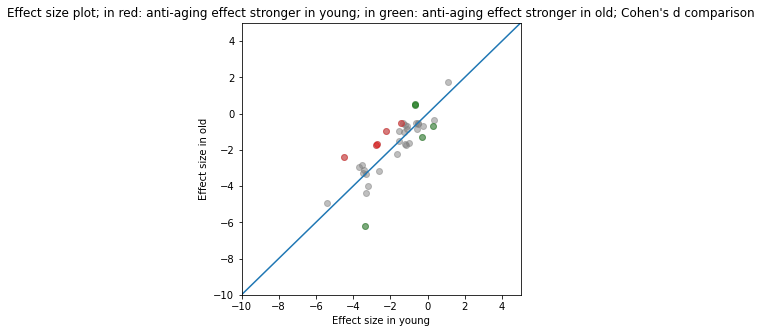

In [126]:
#scatter plot with confidence intervals of cohen's d effect sizes

fig, ax = plt.subplots(figsize=(5, 5))
ax.scatter(df['cohen.d_genotype_inYoung'], df['cohen.d_genotype_inOld'], color='grey', alpha=0.5)


# scatter plot including only the parameters with a significant difference of genotype effects
# in young and old mice (significant difference between Cohen's d effect size of genotype in young)
# vs. old mice)
ax.scatter(df.loc[df.anti_aging_greater_in == 'young','cohen.d_genotype_inYoung'],
           df.loc[df.anti_aging_greater_in == 'young','cohen.d_genotype_inOld'], 
           marker='o', color='red', alpha=0.35)


# scatter plot including only the parameters with a significant difference of genotype effects
# in young and old mice (significant difference between Cohen's d effect size of genotype in young)
# vs. old mice)
ax.scatter(df.loc[df.anti_aging_greater_in == 'old','cohen.d_genotype_inYoung'],
           df.loc[df.anti_aging_greater_in == 'old','cohen.d_genotype_inOld'], 
           marker='o', color='green', alpha=0.35)


slope_line = np.array([-10, 10])
ax.plot(slope_line, slope_line)
ax.set_xlabel('Effect size in young')
ax.set_ylabel('Effect size in old')
ax.set_xlim([-10, 5])
ax.set_ylim([-10, 5])
ax.set_title("Effect size plot; in red: anti-aging effect stronger in young; in green: anti-aging effect stronger in old; Cohen's d comparison")
print('Total number of parameters: ', df.shape[0], '\nAnti-aging effect more in old: ', df[(df.anti_aging_greater_in == 'old')].shape[0]) 


Aging phenotypes accentuated by intervention

In [127]:
# load data from little mice where I had already computed 95% CIs of Cohen's d values
# this is covering the parameters analyzed by ANOVA as well as the ones analyzed by ART


df = pd.read_csv('Statistics_2-wayANOVAs_non-parametric_ART_FisherLSD_ghrhr_allParameters_CORRECTED_withZstatForCohenDcomparison.csv', sep=';')
df['ci_cohen.d_genotype_inYoung_range'] = df['ci_cohen.d_genotype_inYoung_upper'] - df['ci_cohen.d_genotype_inYoung_lower']
df['ci_cohen.d_genotype_inOld_range'] = df['ci_cohen.d_genotype_inOld_upper'] - df['ci_cohen.d_genotype_inOld_lower']

# select only subset of parameters
df = df[(df.aov_p_age < 0.05) & 
                    ( (df.aov_p_geno < 0.05) | 
                     (df.aov_p_genoXage < 0.05) )].sort_values('aov_p_genoXage', ascending=False)

# filter for phenotypes where age and geno effects are in the same directions
df = df[(df['cohen.d_age_inControl'] * df['cohen.d_genotype_inOld'])  > 0] 


# mark whether 'pro-aging' genotype effect is greater in young or old group; based on Cohen's d comparison
df.loc[((df['cohen.d_age_inControl'] * df['cohen.d_genotype_inOld'])  > 0) & 
       ((df['cohen.d_age_inControl'] * df['cohen.d_genotype_inYoung']) < (df['cohen.d_age_inControl'] * df['cohen.d_genotype_inOld'])) &
       (df['p_cohen.d_genotype_inOld_vs_cohen.d_genotype_inYoung'] < 0.05), 
       'pro_aging_greater_in'] = 'old'

# mark whether 'pro-aging' genotype effect is greater in young or old group, based on Cohen's d comparison
df.loc[((df['cohen.d_age_inControl'] * df['cohen.d_genotype_inOld'])  > 0) & 
       ((df['cohen.d_age_inControl'] * df['cohen.d_genotype_inYoung'])  > (df['cohen.d_age_inControl'] * df['cohen.d_genotype_inOld'])) &
       (df['p_cohen.d_genotype_inOld_vs_cohen.d_genotype_inYoung'] < 0.05), 
       'pro_aging_greater_in'] = 'young'


df_acc = df.copy()

df.loc[(df.pro_aging_greater_in == 'old') |  (df.pro_aging_greater_in == 'young'), 
       ['phenotype', 'p_cohen.d_genotype_inOld_vs_cohen.d_genotype_inYoung', 'pro_aging_greater_in', 'cohen.d_age_inControl', 'cohen.d_genotype_inYoung', 'cohen.d_genotype_inOld']]

#df.head()

,phenotype,p_cohen.d_genotype_inOld_vs_cohen.d_genotype_inYoung,pro_aging_greater_in,cohen.d_age_inControl,cohen.d_genotype_inYoung,cohen.d_genotype_inOld
125,X2paws_mean,0.031878,young,-0.717154,-2.836182,-1.737264
69,lens_thickness_avg_ri_le,0.000460,old,0.146074,-1.437467,0.131163
40,BMD_ROI,0.027807,young,-2.520716,-3.379857,-1.195525


Total number of parameters:  18 
Pro-aging effect more in old:  1


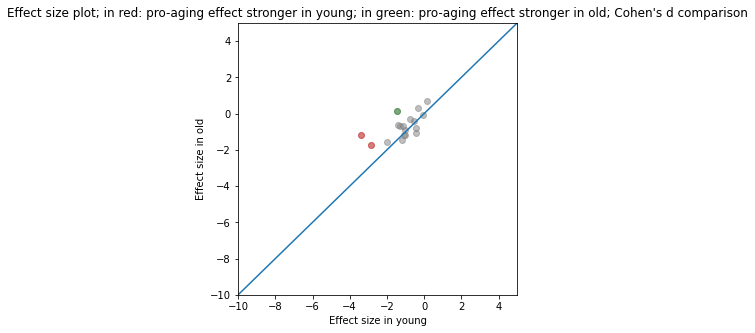

In [128]:
#scatter plot with confidence intervals of cohen's d effect sizes

fig, ax = plt.subplots(figsize=(5, 5))
ax.scatter(df['cohen.d_genotype_inYoung'], df['cohen.d_genotype_inOld'], color='grey', alpha=0.5)


# scatter plot including only the parameters with a significant difference of genotype effects
# in young and old mice (significant difference between Cohen's d effect size of genotype in young)
# vs. old mice)
ax.scatter(df.loc[df.pro_aging_greater_in == 'young','cohen.d_genotype_inYoung'],
           df.loc[df.pro_aging_greater_in == 'young','cohen.d_genotype_inOld'], 
           marker='o', color='red', alpha=0.35)


# scatter plot including only the parameters with a significant difference of genotype effects
# in young and old mice (significant difference between Cohen's d effect size of genotype in young)
# vs. old mice)
ax.scatter(df.loc[df.pro_aging_greater_in == 'old','cohen.d_genotype_inYoung'],
           df.loc[df.pro_aging_greater_in == 'old','cohen.d_genotype_inOld'], 
           marker='o', color='green', alpha=0.35)


slope_line = np.array([-10, 10])
ax.plot(slope_line, slope_line)
ax.set_xlabel('Effect size in young')
ax.set_ylabel('Effect size in old')
ax.set_xlim([-10, 5])
ax.set_ylim([-10, 5])
ax.set_title("Effect size plot; in red: pro-aging effect stronger in young; in green: pro-aging effect stronger in old; Cohen's d comparison")
print('Total number of parameters: ', df.shape[0], '\nPro-aging effect more in old: ', df[(df.pro_aging_greater_in == 'old')].shape[0]) 


Phenotypes influenced by intervention but not age

In [130]:
# load data from little mice where I had already computed 95% CIs of Cohen's d values
# this is covering the parameters analyzed by ANOVA as well as the ones analyzed by ART


df = pd.read_csv('Statistics_2-wayANOVAs_non-parametric_ART_FisherLSD_ghrhr_allParameters_CORRECTED_withZstatForCohenDcomparison.csv', sep=';')
df['ci_cohen.d_genotype_inYoung_range'] = df['ci_cohen.d_genotype_inYoung_upper'] - df['ci_cohen.d_genotype_inYoung_lower']
df['ci_cohen.d_genotype_inOld_range'] = df['ci_cohen.d_genotype_inOld_upper'] - df['ci_cohen.d_genotype_inOld_lower']

# select only subset of parameters
df = df[(df.aov_p_age > 0.05) & 
                    ( (df.aov_p_geno < 0.05) | 
                     (df.aov_p_genoXage < 0.05) )].sort_values('aov_p_genoXage', ascending=False)

df_geno = df.copy()

# show parameters where genotype effects differ significantly between young and old mice
df.loc[(df['p_cohen.d_genotype_inOld_vs_cohen.d_genotype_inYoung'] < 0.05), 
       ['phenotype', 'p_cohen.d_genotype_inOld_vs_cohen.d_genotype_inYoung', 'cohen.d_age_inControl', 'cohen.d_genotype_inYoung', 'cohen.d_genotype_inOld']]

#df.head()

,phenotype,p_cohen.d_genotype_inOld_vs_cohen.d_genotype_inYoung,cohen.d_age_inControl,cohen.d_genotype_inYoung,cohen.d_genotype_inOld
20,Albumin,0.017186,-0.147047,-1.530511,-0.467972
41,BMD_whole_mouse,0.000850,-0.188573,-9.480138,-3.047791
43,Volumetric_BMD_ROI,0.002029,-1.772035,-5.143590,-1.396698
33,LDH,0.022553,0.638412,1.193907,0.206951
92,NK_Ly6C,0.028760,-0.744844,-0.098897,1.396318
129,MCH,0.044873,-0.727187,-0.071937,0.739733
172,TEWL_1,0.012088,-0.826967,-0.514587,0.487772
55,Fract_shortening,0.004843,-0.670040,-0.442242,0.683187
39,Urea,0.003277,0.730867,4.040050,2.193951
54,EJ_fraction,0.004313,-0.730154,-0.337640,0.805372


Total number of parameters:  38 
Parameters different between young and old:  13


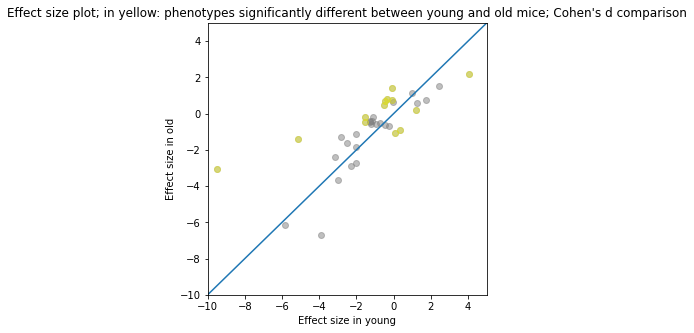

In [131]:
#scatter plot with confidence intervals of cohen's d effect sizes

fig, ax = plt.subplots(figsize=(5, 5))
ax.scatter(df['cohen.d_genotype_inYoung'], df['cohen.d_genotype_inOld'], color='grey', alpha=0.5)


# scatter plot including only the parameters with a significant difference of genotype effects
# in young and old mice (significant difference between Cohen's d effect size of genotype in young)
# vs. old mice)
ax.scatter(df.loc[(df['p_cohen.d_genotype_inOld_vs_cohen.d_genotype_inYoung'] < 0.05),'cohen.d_genotype_inYoung'],
           df.loc[(df['p_cohen.d_genotype_inOld_vs_cohen.d_genotype_inYoung'] < 0.05),'cohen.d_genotype_inOld'], 
           marker='o', color='yellow', alpha=0.35)

slope_line = np.array([-10, 10])
ax.plot(slope_line, slope_line)
ax.set_xlabel('Effect size in young')
ax.set_ylabel('Effect size in old')
ax.set_xlim([-10, 5])
ax.set_ylim([-10, 5])
ax.set_title("Effect size plot; in yellow: phenotypes significantly different between young and old mice; Cohen's d comparison")
print('Total number of parameters: ', df.shape[0], '\nParameters different between young and old: ', df[(df['p_cohen.d_genotype_inOld_vs_cohen.d_genotype_inYoung'] < 0.05)].shape[0]) 
plt.savefig('little_effSizePlot_interventionEffOrInteractButNotAgeEff.svg')

All parameters of the 3 categories above combined

In [132]:
df_amel['type_of_phenotype'] = 'aging_phenotype_ameliorated_by_intervention'
df_acc['type_of_phenotype'] = 'aging_phenotype_accentuated_by_intervention'
df_geno['type_of_phenotype'] = 'phenotype_influenced_by_intervention_but_not_age'

df = pd.concat([df_amel, df_acc, df_geno])
df.to_csv('little_Data_EffectSizePlots.csv')
df.sample(10)

,phenotype,mean_youngContr,ci_youngContr_upper,ci_youngContr_mean,ci_youngContr_lower,sd_youngContr,n_youngContr,mean_youngMut,ci_youngMut_upper,ci_youngMut_mean,...,cohen.d_age_inControl,ci_cohen.d_age_inControl_lower,ci_cohen.d_age_inControl_upper,z_stat_cohen.d_genotype_inOld_vs_cohen.d_genotype_inYoung,p_cohen.d_genotype_inOld_vs_cohen.d_genotype_inYoung,ci_cohen.d_genotype_inYoung_range,ci_cohen.d_genotype_inOld_range,anti_aging_greater_in,type_of_phenotype,pro_aging_greater_in
92,NK_Ly6C,33.827273,39.105324,33.827273,28.549222,7.856474,11,33.000000,39.363863,33.000000,...,-0.744844,-1.721015,0.231328,2.186766,0.028760,1.830131,2.228950,NaN,phenotype_influenced_by_intervention_but_not_age,NaN
201,eu_startle_response,0.966667,1.034841,0.966667,0.898492,0.182574,30,0.950000,1.054651,0.950000,...,-2.977768,-3.734904,-2.220632,-0.053143,0.957618,1.161325,1.052867,NaN,aging_phenotype_accentuated_by_intervention,NaN
30,GPT,34.833333,42.542896,34.833333,27.123771,20.646588,30,75.000000,108.017981,75.000000,...,-0.074570,-0.606376,0.457235,0.270811,0.786537,1.317647,1.187536,NaN,phenotype_influenced_by_intervention_but_not_age,NaN
65,anter_chamb_depth_avg_ri_le,0.557414,0.564541,0.557414,0.550286,0.018738,29,0.494000,0.505233,0.494000,...,2.454279,1.751334,3.157223,-0.071598,0.942921,1.911326,1.707084,NaN,aging_phenotype_ameliorated_by_intervention,NaN
131,MCV,46.033333,46.487848,46.033333,45.578818,1.217214,30,46.210526,46.757223,46.210526,...,0.129725,-0.397218,0.656667,1.338539,0.180721,1.181237,1.113742,NaN,aging_phenotype_accentuated_by_intervention,NaN
17,Total_chol_fasting,2.400880,2.576452,2.400880,2.225308,0.425342,25,1.898929,2.123824,1.898929,...,0.087424,-0.465250,0.640099,1.433044,0.151845,1.463111,1.182632,NaN,phenotype_influenced_by_intervention_but_not_age,NaN
59,LVIDs,1.096000,1.233018,1.096000,0.958982,0.366941,30,0.999000,1.121918,0.999000,...,0.909289,0.356397,1.462180,-2.378482,0.017384,1.166856,1.164162,old,aging_phenotype_ameliorated_by_intervention,NaN
177,Delta_RER,0.183600,0.196054,0.183600,0.171146,0.033353,30,0.152278,0.168938,0.152278,...,-0.330153,-0.860113,0.199806,0.915751,0.359797,1.260561,1.082458,NaN,phenotype_influenced_by_intervention_but_not_age,NaN
184,Max_RER,0.962500,0.979182,0.962500,0.945818,0.044676,30,0.905278,0.925534,0.905278,...,-0.569968,-1.106926,-0.033009,1.550574,0.121004,1.317569,1.090685,NaN,aging_phenotype_accentuated_by_intervention,NaN
149,Body_mass_NMR,27.563333,28.743434,27.563333,26.383233,3.160367,30,14.911111,15.959502,14.911111,...,0.796737,0.249885,1.343588,3.267248,0.001086,2.201039,1.386881,young,aging_phenotype_ameliorated_by_intervention,NaN


Total number of parameters:  94 
Parameters different between young and old:  26


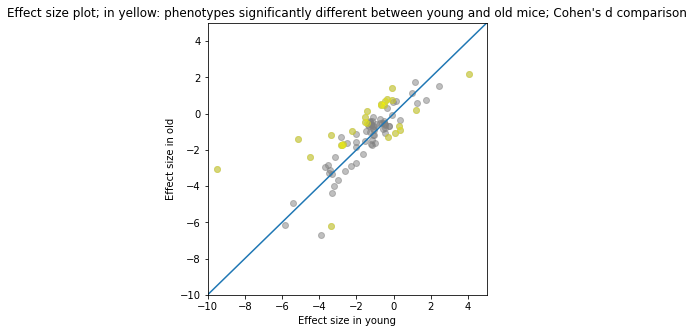

In [133]:
#scatter plot with confidence intervals of cohen's d effect sizes

fig, ax = plt.subplots(figsize=(5, 5))
ax.scatter(df['cohen.d_genotype_inYoung'], df['cohen.d_genotype_inOld'], color='grey', alpha=0.5)


# scatter plot including only the parameters with a significant difference of genotype effects
# in young and old mice (significant difference between Cohen's d effect size of genotype in young)
# vs. old mice)
ax.scatter(df.loc[(df['p_cohen.d_genotype_inOld_vs_cohen.d_genotype_inYoung'] < 0.05),'cohen.d_genotype_inYoung'],
           df.loc[(df['p_cohen.d_genotype_inOld_vs_cohen.d_genotype_inYoung'] < 0.05),'cohen.d_genotype_inOld'], 
           marker='o', color='yellow', alpha=0.35)

slope_line = np.array([-10, 10])
ax.plot(slope_line, slope_line)
ax.set_xlabel('Effect size in young')
ax.set_ylabel('Effect size in old')
ax.set_xlim([-10, 5])
ax.set_ylim([-10, 5])
ax.set_title("Effect size plot; in yellow: phenotypes significantly different between young and old mice; Cohen's d comparison")
print('Total number of parameters: ', df.shape[0], '\nParameters different between young and old: ', df[(df['p_cohen.d_genotype_inOld_vs_cohen.d_genotype_inYoung'] < 0.05)].shape[0]) 
plt.savefig('little_effSizePlot_categoriesCombined.svg')

# mTOR mice

Aging phenotypes ameliorated by the intervention

In [134]:
# load data from mTOR mice where I had already computed 95% CIs of Cohen's d values
# this is covering the parameters analyzed by ANOVA as well as the ones analyzed by ART

df = pd.read_csv('Statistics_2-wayANOVAs_non-parametric_ART_FisherLSD_mTOR_allParameters_CORRECTED_withZstatForCohenDcomparison.csv', sep=';')
df['ci_cohen.d_genotype_inYoung_range'] = df['ci_cohen.d_genotype_inYoung_upper'] - df['ci_cohen.d_genotype_inYoung_lower']
df['ci_cohen.d_genotype_inOld_range'] = df['ci_cohen.d_genotype_inOld_upper'] - df['ci_cohen.d_genotype_inOld_lower']

# select only subset of parameters
df = df[(df.aov_p_age < 0.05) & 
                    ( (df.aov_p_geno < 0.05) | 
                     (df.aov_p_genoXage < 0.05) )].sort_values('aov_p_genoXage', ascending=False)

# filter for phenotypes where age and geno effects are in opposing directions
df = df[(df['cohen.d_age_inControl'] * df['cohen.d_genotype_inOld'])  < 0] 

# mark whether 'anti-aging' genotype effect is greater in young or old group
df.loc[((df['cohen.d_age_inControl'] * df['cohen.d_genotype_inOld'])  < 0) & 
       ((df['cohen.d_age_inControl'] * df['cohen.d_genotype_inYoung'])  < (df['cohen.d_age_inControl'] * df['cohen.d_genotype_inOld'])) &
       (df['p_cohen.d_genotype_inOld_vs_cohen.d_genotype_inYoung'] < 0.05), 
       'anti_aging_greater_in'] = 'young'


# mark whether 'anti-aging' genotype effect is greater in young or old group
df.loc[((df['cohen.d_age_inControl'] * df['cohen.d_genotype_inOld'])  < 0) & 
       ((df['cohen.d_age_inControl'] * df['cohen.d_genotype_inYoung']) > (df['cohen.d_age_inControl'] * df['cohen.d_genotype_inOld'])) &
       (df['p_cohen.d_genotype_inOld_vs_cohen.d_genotype_inYoung'] < 0.05), 
       'anti_aging_greater_in'] = 'old'

# mark whether 'anti-aging' genotype effect is greater in young or old group; based on ANOVA interaction term
df.loc[((df['cohen.d_age_inControl'] * df['cohen.d_genotype_inOld'])  < 0) & 
       ((df['cohen.d_age_inControl'] * df['cohen.d_genotype_inYoung']) > (df['cohen.d_age_inControl'] * df['cohen.d_genotype_inOld'])) &
       (df['aov_p_genoXage'] < 0.05), 
       'for_interaction_anti_aging_greater_in'] = 'old'

# mark whether 'anti-aging' genotype effect is greater in young or old group; based on ANOVA interaction term
df.loc[((df['cohen.d_age_inControl'] * df['cohen.d_genotype_inOld'])  < 0) & 
       ((df['cohen.d_age_inControl'] * df['cohen.d_genotype_inYoung']) < (df['cohen.d_age_inControl'] * df['cohen.d_genotype_inOld'])) &
       (df['aov_p_genoXage'] < 0.05), 
       'for_interaction_anti_aging_greater_in'] = 'young'

df_amel = df.copy()

df.loc[(df.anti_aging_greater_in == 'old') |  (df.anti_aging_greater_in == 'young'), 
       ['phenotype', 'p_cohen.d_genotype_inOld_vs_cohen.d_genotype_inYoung', 'anti_aging_greater_in', 'cohen.d_age_inControl', 'cohen.d_genotype_inYoung', 'cohen.d_genotype_inOld']]
#df.head()

,phenotype,p_cohen.d_genotype_inOld_vs_cohen.d_genotype_inYoung,anti_aging_greater_in,cohen.d_age_inControl,cohen.d_genotype_inYoung,cohen.d_genotype_inOld
182,Lung_weight,0.026944,young,0.639613,-1.750774,-0.655184
36,Trig,0.002334,old,-1.010888,-0.104311,1.344999
163,Food_intake_1,0.037461,old,-1.032491,-0.731336,0.198918
201,ThresholdAt6kHz,0.029450,old,5.149296,0.986811,-0.097310
122,HCT,0.037349,old,-1.167344,-0.404315,0.539943
123,HGB,0.023608,old,-1.206837,-0.434577,0.594725
96,CD4_CD44_62L_6C_PNN,0.012613,old,0.257561,0.183541,-1.644893
110,CD8_CD44_62L_6C_PPN,0.001799,old,0.380776,1.305812,-0.984192
97,CD4_CD44_62L_6C_PNP,0.010076,old,-0.388398,-0.186334,1.710547
197,ThresholdAt12kHz,0.000125,old,14.099370,0.994789,-0.971862


In [135]:
df.loc[(df.for_interaction_anti_aging_greater_in == 'old') |  (df.for_interaction_anti_aging_greater_in == 'young'), 
       ['phenotype', 'aov_p_genoXage', 'p_cohen.d_genotype_inOld_vs_cohen.d_genotype_inYoung', 'for_interaction_anti_aging_greater_in', 'cohen.d_age_inControl', 'cohen.d_genotype_inYoung', 'cohen.d_genotype_inOld']]

,phenotype,aov_p_genoXage,p_cohen.d_genotype_inOld_vs_cohen.d_genotype_inYoung,for_interaction_anti_aging_greater_in,cohen.d_age_inControl,cohen.d_genotype_inYoung,cohen.d_genotype_inOld
36,Trig,0.048869,0.002334,old,-1.010888,-0.104311,1.344999
163,Food_intake_1,0.044733,0.037461,old,-1.032491,-0.731336,0.198918
146,Body_mass_NMR,0.043169,0.923748,young,2.534000,-1.970510,-1.919574
147,Fat_mass_NMR,0.036517,0.841370,old,2.281992,-0.857450,-0.950101
201,ThresholdAt6kHz,0.034905,0.029450,old,5.149296,0.986811,-0.097310
65,B_CD11b,0.032959,0.492826,old,1.310034,-0.794217,-1.317370
122,HCT,0.032396,0.037349,old,-1.167344,-0.404315,0.539943
56,LVIDd,0.025524,0.168654,old,1.260707,-0.358830,-0.984761
78,Monocytes,0.021627,0.625046,old,2.138441,-1.454844,-1.840973
148,free_fluid,0.020387,0.979914,young,2.527098,-1.214617,-1.202565


Total number of parameters:  56 
Anti-aging effect more in old:  11


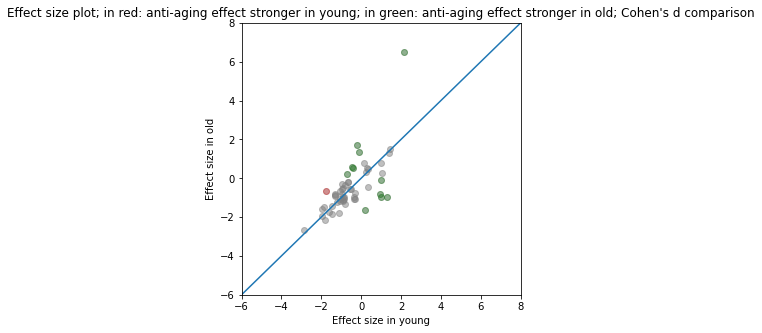

In [136]:
#scatter plot with confidence intervals of cohen's d effect sizes

fig, ax = plt.subplots(figsize=(5, 5))
ax.scatter(df['cohen.d_genotype_inYoung'], df['cohen.d_genotype_inOld'], color='grey', alpha=0.5)


# scatter plot including only the parameters with a significant difference of genotype effects
# in young and old mice (significant difference between Cohen's d effect size of genotype in young)
# vs. old mice)
ax.scatter(df.loc[df.anti_aging_greater_in == 'young','cohen.d_genotype_inYoung'],
           df.loc[df.anti_aging_greater_in == 'young','cohen.d_genotype_inOld'], 
           marker='o', color='red', alpha=0.25)


# scatter plot including only the parameters with a significant difference of genotype effects
# in young and old mice (significant difference between Cohen's d effect size of genotype in young)
# vs. old mice)
ax.scatter(df.loc[df.anti_aging_greater_in == 'old','cohen.d_genotype_inYoung'],
           df.loc[df.anti_aging_greater_in == 'old','cohen.d_genotype_inOld'], 
           marker='o', color='green', alpha=0.25)


slope_line = np.array([-8, 8])
ax.plot(slope_line, slope_line)
ax.set_xlabel('Effect size in young')
ax.set_ylabel('Effect size in old')
ax.set_xlim([-6, 8])
ax.set_ylim([-6, 8])
ax.set_title("Effect size plot; in red: anti-aging effect stronger in young; in green: anti-aging effect stronger in old; Cohen's d comparison")
print('Total number of parameters: ', df.shape[0], '\nAnti-aging effect more in old: ', df[(df.anti_aging_greater_in == 'old')].shape[0]) 


Aging phenotypes accentuated by intervention

In [137]:
# load data from mTOR mice where I had already computed 95% CIs of Cohen's d values
# this is covering the parameters analyzed by ANOVA as well as the ones analyzed by ART


df = pd.read_csv('Statistics_2-wayANOVAs_non-parametric_ART_FisherLSD_mTOR_allParameters_CORRECTED_withZstatForCohenDcomparison.csv', sep=';')
df['ci_cohen.d_genotype_inYoung_range'] = df['ci_cohen.d_genotype_inYoung_upper'] - df['ci_cohen.d_genotype_inYoung_lower']
df['ci_cohen.d_genotype_inOld_range'] = df['ci_cohen.d_genotype_inOld_upper'] - df['ci_cohen.d_genotype_inOld_lower']

# select only subset of parameters
df = df[(df.aov_p_age < 0.05) & 
                    ( (df.aov_p_geno < 0.05) | 
                     (df.aov_p_genoXage < 0.05) )].sort_values('aov_p_genoXage', ascending=False)

# filter for phenotypes where age and geno effects are in the same directions
df = df[(df['cohen.d_age_inControl'] * df['cohen.d_genotype_inOld'])  > 0] 


# mark whether 'pro-aging' genotype effect is greater in young or old group; based on Cohen's d comparison
df.loc[((df['cohen.d_age_inControl'] * df['cohen.d_genotype_inOld'])  > 0) & 
       ((df['cohen.d_age_inControl'] * df['cohen.d_genotype_inYoung']) < (df['cohen.d_age_inControl'] * df['cohen.d_genotype_inOld'])) &
       (df['p_cohen.d_genotype_inOld_vs_cohen.d_genotype_inYoung'] < 0.05), 
       'pro_aging_greater_in'] = 'old'

# mark whether 'pro-aging' genotype effect is greater in young or old group, based on Cohen's d comparison
df.loc[((df['cohen.d_age_inControl'] * df['cohen.d_genotype_inOld'])  > 0) & 
       ((df['cohen.d_age_inControl'] * df['cohen.d_genotype_inYoung'])  > (df['cohen.d_age_inControl'] * df['cohen.d_genotype_inOld'])) &
       (df['p_cohen.d_genotype_inOld_vs_cohen.d_genotype_inYoung'] < 0.05), 
       'pro_aging_greater_in'] = 'young'

df_acc = df.copy()

df.loc[(df.pro_aging_greater_in == 'old') |  (df.pro_aging_greater_in == 'young'), 
       ['phenotype', 'p_cohen.d_genotype_inOld_vs_cohen.d_genotype_inYoung', 'pro_aging_greater_in', 'cohen.d_age_inControl', 'cohen.d_genotype_inYoung', 'cohen.d_genotype_inOld']]

#df.head()

,phenotype,p_cohen.d_genotype_inOld_vs_cohen.d_genotype_inYoung,pro_aging_greater_in,cohen.d_age_inControl,cohen.d_genotype_inYoung,cohen.d_genotype_inOld
176,Testis_weight,0.034256,young,-0.912537,-5.636278,-3.241038
113,CD8_Ly6C,0.003003,old,0.099203,-1.723116,0.487648
39,BMD_ROI,0.031339,young,-1.711424,-1.114653,-0.112239
20,alpha_Amylase_CNPG3,0.009806,old,0.166734,-0.803269,0.390462
9,ST110,0.004596,old,-0.576530,0.940235,-0.328196


Total number of parameters:  15 
Pro-aging effect more in old:  3


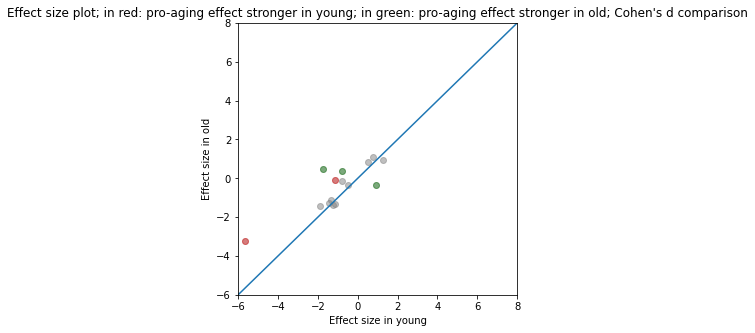

In [138]:
#scatter plot with confidence intervals of cohen's d effect sizes

fig, ax = plt.subplots(figsize=(5, 5))
ax.scatter(df['cohen.d_genotype_inYoung'], df['cohen.d_genotype_inOld'], color='grey', alpha=0.5)


# scatter plot including only the parameters with a significant difference of genotype effects
# in young and old mice (significant difference between Cohen's d effect size of genotype in young)
# vs. old mice)
ax.scatter(df.loc[df.pro_aging_greater_in == 'young','cohen.d_genotype_inYoung'],
           df.loc[df.pro_aging_greater_in == 'young','cohen.d_genotype_inOld'], 
           marker='o', color='red', alpha=0.35)


# scatter plot including only the parameters with a significant difference of genotype effects
# in young and old mice (significant difference between Cohen's d effect size of genotype in young)
# vs. old mice)
ax.scatter(df.loc[df.pro_aging_greater_in == 'old','cohen.d_genotype_inYoung'],
           df.loc[df.pro_aging_greater_in == 'old','cohen.d_genotype_inOld'], 
           marker='o', color='green', alpha=0.35)


slope_line = np.array([-10, 10])
ax.plot(slope_line, slope_line)
ax.set_xlabel('Effect size in young')
ax.set_ylabel('Effect size in old')
ax.set_xlim([-6, 8])
ax.set_ylim([-6, 8])
ax.set_title("Effect size plot; in red: pro-aging effect stronger in young; in green: pro-aging effect stronger in old; Cohen's d comparison")
print('Total number of parameters: ', df.shape[0], '\nPro-aging effect more in old: ', df[(df.pro_aging_greater_in == 'old')].shape[0]) 


Phenotypes influenced by intervention but not age

In [140]:
# load data from mTOR mice where I had already computed 95% CIs of Cohen's d values
# this is covering the parameters analyzed by ANOVA as well as the ones analyzed by ART


df = pd.read_csv('Statistics_2-wayANOVAs_non-parametric_ART_FisherLSD_mTOR_allParameters_CORRECTED_withZstatForCohenDcomparison.csv', sep=';')
df['ci_cohen.d_genotype_inYoung_range'] = df['ci_cohen.d_genotype_inYoung_upper'] - df['ci_cohen.d_genotype_inYoung_lower']
df['ci_cohen.d_genotype_inOld_range'] = df['ci_cohen.d_genotype_inOld_upper'] - df['ci_cohen.d_genotype_inOld_lower']

# select only subset of parameters
df = df[(df.aov_p_age > 0.05) & 
                    ( (df.aov_p_geno < 0.05) | 
                     (df.aov_p_genoXage < 0.05) ) ]

df_geno = df.copy()

# show parameters where genotype effects differ significantly between young and old mice
df.loc[(df['p_cohen.d_genotype_inOld_vs_cohen.d_genotype_inYoung'] < 0.05), 
       ['phenotype', 'p_cohen.d_genotype_inOld_vs_cohen.d_genotype_inYoung', 'cohen.d_age_inControl', 'cohen.d_genotype_inYoung', 'cohen.d_genotype_inOld']]

,phenotype,p_cohen.d_genotype_inOld_vs_cohen.d_genotype_inYoung,cohen.d_age_inControl,cohen.d_genotype_inYoung,cohen.d_genotype_inOld
19,Albumin,0.032199,-0.379052,-0.656165,0.322614
31,Lactat_AU400,0.042387,-0.358377,-0.181498,0.749776
64,B2,0.037001,-0.947536,-0.605026,0.937350
74,Ly6CnegCD11c,0.026183,-0.611497,-1.164788,-3.251441
80,Mono_Ly6C_low,0.033562,-0.363473,-1.143642,-3.082464
85,NK_Ly6C,0.043888,-0.858108,-2.669643,-0.916455
94,CD4_CD44_62L_6C_NPN,0.002090,1.918666,0.205997,-2.162002
95,CD4_CD44_62L_6C_NPP,0.001738,-1.986471,-0.236339,2.178464
101,CD4_Ly6C,0.022497,-2.364852,0.349652,2.097873
104,CD8_CD44_62L_6C_NNN,0.013789,0.501247,2.598392,0.583833


Total number of parameters:  41 
Parameters different between young and old:  14


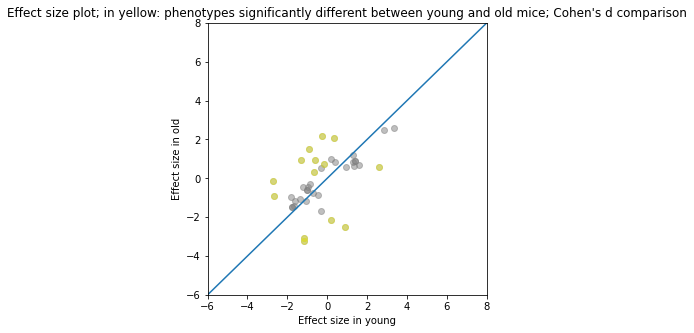

In [141]:
#scatter plot with confidence intervals of cohen's d effect sizes

fig, ax = plt.subplots(figsize=(5, 5))
ax.scatter(df['cohen.d_genotype_inYoung'], df['cohen.d_genotype_inOld'], color='grey', alpha=0.5)


# scatter plot including only the parameters with a significant difference of genotype effects
# in young and old mice (significant difference between Cohen's d effect size of genotype in young)
# vs. old mice)
ax.scatter(df.loc[(df['p_cohen.d_genotype_inOld_vs_cohen.d_genotype_inYoung'] < 0.05),'cohen.d_genotype_inYoung'],
           df.loc[(df['p_cohen.d_genotype_inOld_vs_cohen.d_genotype_inYoung'] < 0.05),'cohen.d_genotype_inOld'], 
           marker='o', color='yellow', alpha=0.35)

slope_line = np.array([-10, 10])
ax.plot(slope_line, slope_line)
ax.set_xlabel('Effect size in young')
ax.set_ylabel('Effect size in old')
ax.set_xlim([-6, 8])
ax.set_ylim([-6, 8])
ax.set_title("Effect size plot; in yellow: phenotypes significantly different between young and old mice; Cohen's d comparison")
print('Total number of parameters: ', df.shape[0], '\nParameters different between young and old: ', df[(df['p_cohen.d_genotype_inOld_vs_cohen.d_genotype_inYoung'] < 0.05)].shape[0]) 
plt.savefig('mTOR_effSizePlot_interventionEffOrInteractButNotAgeEff.svg')

All parameters of the 3 categories above combined

In [142]:
df_amel['type_of_phenotype'] = 'aging_phenotype_ameliorated_by_intervention'
df_acc['type_of_phenotype'] = 'aging_phenotype_accentuated_by_intervention'
df_geno['type_of_phenotype'] = 'phenotype_influenced_by_intervention_but_not_age'

df = pd.concat([df_amel, df_acc, df_geno])
df.to_csv('mTOR_Data_EffectSizePlots.csv')
df.sample(10)

,phenotype,mean_youngContr,ci_youngContr_upper,ci_youngContr_mean,ci_youngContr_lower,sd_youngContr,n_youngContr,mean_youngMut,ci_youngMut_upper,ci_youngMut_mean,...,ci_cohen.d_age_inControl_lower,ci_cohen.d_age_inControl_upper,z_stat_cohen.d_genotype_inOld_vs_cohen.d_genotype_inYoung,p_cohen.d_genotype_inOld_vs_cohen.d_genotype_inYoung,ci_cohen.d_genotype_inYoung_range,ci_cohen.d_genotype_inOld_range,anti_aging_greater_in,for_interaction_anti_aging_greater_in,type_of_phenotype,pro_aging_greater_in
167,Min_VO2,64.769231,68.978119,64.769231,60.560342,10.420394,26,54.200000,60.652206,54.200000,...,0.438987,1.624979,-0.349826,0.726469,1.254765,1.392077,NaN,NaN,aging_phenotype_ameliorated_by_intervention,NaN
31,Lactat_AU400,9.165185,10.262509,9.165185,8.067862,2.773913,27,8.654211,10.039475,8.654211,...,-0.926639,0.209885,2.029699,0.042387,1.209400,1.407983,NaN,NaN,phenotype_influenced_by_intervention_but_not_age,NaN
129,NLYM,4.470400,5.262760,4.470400,3.678040,1.919571,25,8.966000,10.958024,8.966000,...,-0.430621,0.720695,-1.075818,0.282009,1.351748,1.426188,NaN,NaN,phenotype_influenced_by_intervention_but_not_age,NaN
110,CD8_CD44_62L_6C_PPN,23.498889,31.022124,23.498889,15.975654,9.787365,9,40.343750,53.485803,40.343750,...,-0.664234,1.425785,-3.121597,0.001799,2.280800,2.127973,old,old,aging_phenotype_ameliorated_by_intervention,NaN
145,IpGTT_AUC,19.992885,22.785262,19.992885,17.200507,6.913387,26,24.195800,28.310118,24.195800,...,-0.253283,0.879392,0.612433,0.540251,1.220146,1.373273,NaN,NaN,aging_phenotype_accentuated_by_intervention,NaN
118,X2paws_mean,83.859231,89.735484,83.859231,77.982978,14.548467,26,72.100000,76.636049,72.100000,...,-0.164523,0.985686,0.960215,0.336947,1.260579,1.352474,NaN,NaN,aging_phenotype_ameliorated_by_intervention,NaN
13,NEFA_fasting,0.796538,0.869885,0.796538,0.723192,0.181592,26,0.877333,0.996391,0.877333,...,-0.401355,0.714499,0.868342,0.385207,1.324751,1.362309,NaN,NaN,phenotype_influenced_by_intervention_but_not_age,NaN
73,Ly6CmedCD11cneg,13.732222,16.740421,13.732222,10.724024,3.913521,9,37.628571,46.737514,37.628571,...,0.043068,2.394010,-0.752695,0.451633,3.346296,2.920260,NaN,NaN,phenotype_influenced_by_intervention_but_not_age,NaN
0,conc_IgE,451942.070400,652304.518400,451942.070400,251579.622300,506494.239600,27,67236.925560,99775.205120,67236.925560,...,0.207652,1.378532,0.382862,0.701822,1.294958,1.412754,NaN,NaN,aging_phenotype_ameliorated_by_intervention,NaN
77,MLy6Cneg,4.704444,5.577975,4.704444,3.830914,1.136421,9,2.905714,3.606441,2.905714,...,0.873346,3.627468,-0.387600,0.698312,2.561991,2.707660,NaN,old,aging_phenotype_ameliorated_by_intervention,NaN


Total number of parameters:  112 
Parameters different between young and old:  31


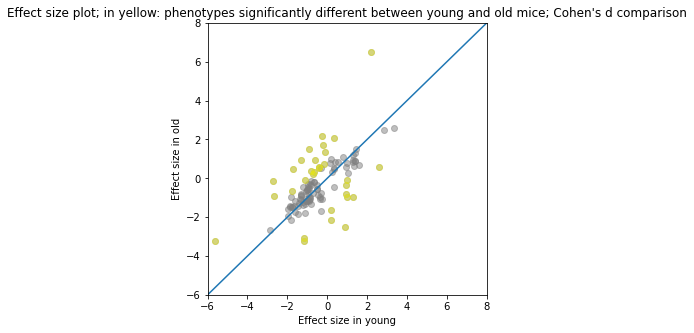

In [143]:
#scatter plot with confidence intervals of cohen's d effect sizes

fig, ax = plt.subplots(figsize=(5, 5))
ax.scatter(df['cohen.d_genotype_inYoung'], df['cohen.d_genotype_inOld'], color='grey', alpha=0.5)


# scatter plot including only the parameters with a significant difference of genotype effects
# in young and old mice (significant difference between Cohen's d effect size of genotype in young)
# vs. old mice)
ax.scatter(df.loc[(df['p_cohen.d_genotype_inOld_vs_cohen.d_genotype_inYoung'] < 0.05),'cohen.d_genotype_inYoung'],
           df.loc[(df['p_cohen.d_genotype_inOld_vs_cohen.d_genotype_inYoung'] < 0.05),'cohen.d_genotype_inOld'], 
           marker='o', color='yellow', alpha=0.35)

slope_line = np.array([-10, 10])
ax.plot(slope_line, slope_line)
ax.set_xlabel('Effect size in young')
ax.set_ylabel('Effect size in old')
ax.set_xlim([-6, 8])
ax.set_ylim([-6, 8])
ax.set_title("Effect size plot; in yellow: phenotypes significantly different between young and old mice; Cohen's d comparison")
print('Total number of parameters: ', df.shape[0], '\nParameters different between young and old: ', df[(df['p_cohen.d_genotype_inOld_vs_cohen.d_genotype_inYoung'] < 0.05)].shape[0]) 
plt.savefig('mTOR_effSizePlot_allCategoriesCombined.svg')

# IF mice

Aging phenotypes ameliorated by the intervention

In [144]:
# load data from IF mice where I had already computed 95% CIs of Cohen's d values
# this is covering the parameters analyzed by ANOVA as well as the ones analyzed by ART

df = pd.read_csv('Statistics_2-wayANOVAs_non-parametric_ART_IF_allParameters_CORRECTED_withZstatForCohenDcomparison.csv', sep=';')
df['ci_cohen.d_genotype_inYoung_range'] = df['ci_cohen.d_genotype_inYoung_upper'] - df['ci_cohen.d_genotype_inYoung_lower']
df['ci_cohen.d_genotype_inOld_range'] = df['ci_cohen.d_genotype_inOld_upper'] - df['ci_cohen.d_genotype_inOld_lower']

# select only subset of parameters
df = df[(df.aov_p_age < 0.05) & 
                    ( (df.aov_p_diet < 0.05) | 
                     (df.aov_p_dietXage < 0.05) )].sort_values('aov_p_dietXage', ascending=False)

# filter for phenotypes where age and geno effects are in opposing directions
df = df[(df['cohen.d_age_inControl'] * df['cohen.d_genotype_inOld'])  < 0] 

# mark whether 'anti-aging' genotype effect is greater in young or old group
df.loc[((df['cohen.d_age_inControl'] * df['cohen.d_genotype_inOld'])  < 0) & 
       ((df['cohen.d_age_inControl'] * df['cohen.d_genotype_inYoung'])  < (df['cohen.d_age_inControl'] * df['cohen.d_genotype_inOld'])) &
       (df['p_cohen.d_genotype_inOld_vs_cohen.d_genotype_inYoung'] < 0.05), 
       'anti_aging_greater_in'] = 'young'


# mark whether 'anti-aging' genotype effect is greater in young or old group
df.loc[((df['cohen.d_age_inControl'] * df['cohen.d_genotype_inOld'])  < 0) & 
       ((df['cohen.d_age_inControl'] * df['cohen.d_genotype_inYoung']) > (df['cohen.d_age_inControl'] * df['cohen.d_genotype_inOld'])) &
       (df['p_cohen.d_genotype_inOld_vs_cohen.d_genotype_inYoung'] < 0.05), 
       'anti_aging_greater_in'] = 'old'

df_amel = df.copy()

df.loc[(df.anti_aging_greater_in == 'old') |  (df.anti_aging_greater_in == 'young'), 
       ['phenotype', 'p_cohen.d_genotype_inOld_vs_cohen.d_genotype_inYoung', 'anti_aging_greater_in', 'cohen.d_age_inControl', 'cohen.d_genotype_inYoung', 'cohen.d_genotype_inOld']]
#df.head()

,phenotype,p_cohen.d_genotype_inOld_vs_cohen.d_genotype_inYoung,anti_aging_greater_in,cohen.d_age_inControl,cohen.d_genotype_inYoung,cohen.d_genotype_inOld
22,Delta_RER,0.040864,old,-0.907073,0.907823,2.083822
16,UIBC,0.017037,young,0.701362,-2.227512,-0.864771
21,M_Ar,0.038101,old,2.773691,0.826583,-0.424390
14,Max_RER,0.007014,old,-1.158302,0.478782,1.993646
19,Urea,0.031208,old,1.214733,0.291590,-0.737716
5,MLy6Cneg,0.001294,old,1.584837,1.194944,-0.396314
15,Avg_RER,0.011702,old,-1.520168,-0.084863,1.234576
2,Fat_mass_NMR,0.000098,old,1.946781,1.517919,-0.464057
13,NKT,0.005962,old,-1.802080,-0.354233,0.975218
3,MLy6C,0.000199,old,1.394662,1.475797,-0.408036


Total number of parameters:  42 
Anti-aging effect more in old:  11


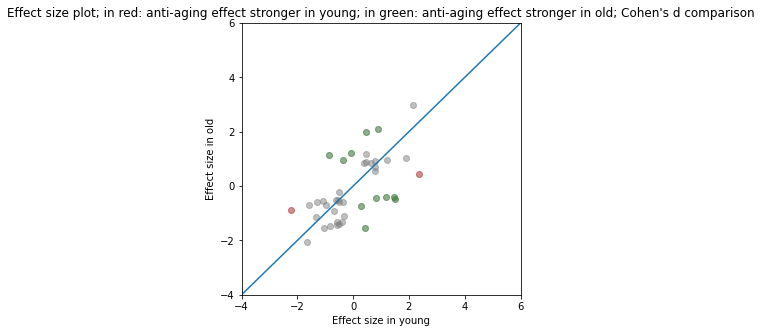

In [145]:
#scatter plot with confidence intervals of cohen's d effect sizes

fig, ax = plt.subplots(figsize=(5, 5))
ax.scatter(df['cohen.d_genotype_inYoung'], df['cohen.d_genotype_inOld'], color='grey', alpha=0.5)


# scatter plot including only the parameters with a significant difference of genotype effects
# in young and old mice (significant difference between Cohen's d effect size of genotype in young)
# vs. old mice)
ax.scatter(df.loc[df.anti_aging_greater_in == 'young','cohen.d_genotype_inYoung'],
           df.loc[df.anti_aging_greater_in == 'young','cohen.d_genotype_inOld'], 
           marker='o', color='red', alpha=0.25)


# scatter plot including only the parameters with a significant difference of genotype effects
# in young and old mice (significant difference between Cohen's d effect size of genotype in young)
# vs. old mice)
ax.scatter(df.loc[df.anti_aging_greater_in == 'old','cohen.d_genotype_inYoung'],
           df.loc[df.anti_aging_greater_in == 'old','cohen.d_genotype_inOld'], 
           marker='o', color='green', alpha=0.25)

slope_line = np.array([-8, 8])
ax.plot(slope_line, slope_line)
ax.set_xlabel('Effect size in young')
ax.set_ylabel('Effect size in old')
ax.set_xlim([-4, 6])
ax.set_ylim([-4, 6])
ax.set_title("Effect size plot; in red: anti-aging effect stronger in young; in green: anti-aging effect stronger in old; Cohen's d comparison")
print('Total number of parameters: ', df.shape[0], '\nAnti-aging effect more in old: ', df[(df.anti_aging_greater_in == 'old')].shape[0]) 
     

Aging phenotypes accentuated by the intervention

In [146]:
# load data from IF mice where I had already computed 95% CIs of Cohen's d values
# this is covering the parameters analyzed by ANOVA as well as the ones analyzed by ART


df = pd.read_csv('Statistics_2-wayANOVAs_non-parametric_ART_IF_allParameters_CORRECTED_withZstatForCohenDcomparison.csv', sep=';')
df['ci_cohen.d_genotype_inYoung_range'] = df['ci_cohen.d_genotype_inYoung_upper'] - df['ci_cohen.d_genotype_inYoung_lower']
df['ci_cohen.d_genotype_inOld_range'] = df['ci_cohen.d_genotype_inOld_upper'] - df['ci_cohen.d_genotype_inOld_lower']

# select only subset of parameters
df = df[(df.aov_p_age < 0.05) & 
                    ( (df.aov_p_diet < 0.05) | 
                     (df.aov_p_dietXage < 0.05) )]

# filter for phenotypes where age and geno effects are in the same directions
df = df[(df['cohen.d_age_inControl'] * df['cohen.d_genotype_inOld'])  > 0] 


# mark whether 'pro-aging' genotype effect is greater in young or old group; based on Cohen's d comparison
df.loc[((df['cohen.d_age_inControl'] * df['cohen.d_genotype_inOld'])  > 0) & 
       ((df['cohen.d_age_inControl'] * df['cohen.d_genotype_inYoung']) < (df['cohen.d_age_inControl'] * df['cohen.d_genotype_inOld'])) &
       (df['p_cohen.d_genotype_inOld_vs_cohen.d_genotype_inYoung'] < 0.05), 
       'pro_aging_greater_in'] = 'old'

# mark whether 'pro-aging' genotype effect is greater in young or old group, based on Cohen's d comparison
df.loc[((df['cohen.d_age_inControl'] * df['cohen.d_genotype_inOld'])  > 0) & 
       ((df['cohen.d_age_inControl'] * df['cohen.d_genotype_inYoung'])  > (df['cohen.d_age_inControl'] * df['cohen.d_genotype_inOld'])) &
       (df['p_cohen.d_genotype_inOld_vs_cohen.d_genotype_inYoung'] < 0.05), 
       'pro_aging_greater_in'] = 'young'

df_acc = df.copy()

df.loc[(df.pro_aging_greater_in == 'old') |  (df.pro_aging_greater_in == 'young'), 
       ['phenotype', 'p_cohen.d_genotype_inOld_vs_cohen.d_genotype_inYoung', 'pro_aging_greater_in', 'cohen.d_age_inControl', 'cohen.d_genotype_inYoung', 'cohen.d_genotype_inOld']]


,phenotype,p_cohen.d_genotype_inOld_vs_cohen.d_genotype_inYoung,pro_aging_greater_in,cohen.d_age_inControl,cohen.d_genotype_inYoung,cohen.d_genotype_inOld
4,QT,0.001238,old,0.148662,-0.753673,1.422385
11,QTc,0.003453,old,0.053103,-1.037558,0.901604
18,HR,0.028788,old,-0.392132,-0.356850,-1.864115
20,RR,0.034284,old,0.359800,0.404290,1.865117


Total number of parameters:  11 
Pro-aging effect more in old:  4


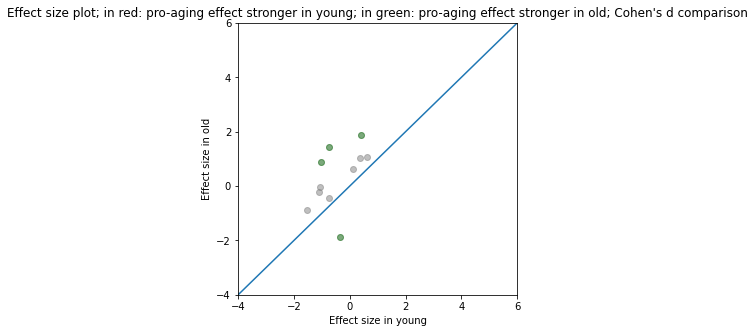

In [147]:
#scatter plot with confidence intervals of cohen's d effect sizes

fig, ax = plt.subplots(figsize=(5, 5))
ax.scatter(df['cohen.d_genotype_inYoung'], df['cohen.d_genotype_inOld'], color='grey', alpha=0.5)


# scatter plot including only the parameters with a significant difference of genotype effects
# in young and old mice (significant difference between Cohen's d effect size of genotype in young)
# vs. old mice)
ax.scatter(df.loc[df.pro_aging_greater_in == 'young','cohen.d_genotype_inYoung'],
           df.loc[df.pro_aging_greater_in == 'young','cohen.d_genotype_inOld'], 
           marker='o', color='red', alpha=0.35)


# scatter plot including only the parameters with a significant difference of genotype effects
# in young and old mice (significant difference between Cohen's d effect size of genotype in young)
# vs. old mice)
ax.scatter(df.loc[df.pro_aging_greater_in == 'old','cohen.d_genotype_inYoung'],
           df.loc[df.pro_aging_greater_in == 'old','cohen.d_genotype_inOld'], 
           marker='o', color='green', alpha=0.35)


slope_line = np.array([-10, 10])
ax.plot(slope_line, slope_line)
ax.set_xlabel('Effect size in young')
ax.set_ylabel('Effect size in old')
ax.set_xlim([-4, 6])
ax.set_ylim([-4, 6])
ax.set_title("Effect size plot; in red: pro-aging effect stronger in young; in green: pro-aging effect stronger in old; Cohen's d comparison")
print('Total number of parameters: ', df.shape[0], '\nPro-aging effect more in old: ', df[(df.pro_aging_greater_in == 'old')].shape[0]) 


Phenotypes influenced by intervention but not age

In [149]:
# load data from IF mice where I had already computed 95% CIs of Cohen's d values
# this is covering the parameters analyzed by ANOVA as well as the ones analyzed by ART


df = pd.read_csv('Statistics_2-wayANOVAs_non-parametric_ART_IF_allParameters_CORRECTED_withZstatForCohenDcomparison.csv', sep=';')
df['ci_cohen.d_genotype_inYoung_range'] = df['ci_cohen.d_genotype_inYoung_upper'] - df['ci_cohen.d_genotype_inYoung_lower']
df['ci_cohen.d_genotype_inOld_range'] = df['ci_cohen.d_genotype_inOld_upper'] - df['ci_cohen.d_genotype_inOld_lower']

# select only subset of parameters
df = df[(df.aov_p_age > 0.05) & 
                    ( (df.aov_p_diet < 0.05) | 
                     (df.aov_p_dietXage < 0.05) )]

df_geno = df.copy()

# show parameters where genotype effects differ significantly between young and old mice
df.loc[(df['p_cohen.d_genotype_inOld_vs_cohen.d_genotype_inYoung'] < 0.05), 
       ['phenotype', 'p_cohen.d_genotype_inOld_vs_cohen.d_genotype_inYoung', 'cohen.d_age_inControl', 'cohen.d_genotype_inYoung', 'cohen.d_genotype_inOld']]

,phenotype,p_cohen.d_genotype_inOld_vs_cohen.d_genotype_inYoung,cohen.d_age_inControl,cohen.d_genotype_inYoung,cohen.d_genotype_inOld
0,MCV,1.150000e-07,0.191545,3.967528,0.342164
6,Total_chol_fasting,1.470611e-03,0.660996,-0.263366,-1.865214
7,Glycerol_fasting,1.782324e-03,1.002172,1.185104,-0.336316
9,HDL_fasting,2.513665e-03,0.595263,-0.634781,-2.219227
10,Ly6CmedCD11c,2.519014e-03,-1.322124,-1.334411,0.171966
17,MCH,1.747624e-02,-0.031576,1.790432,0.546221
23,Ca,4.221051e-02,0.669723,0.075569,-0.899026
24,Chol,4.286752e-02,0.186418,0.560127,-0.411133
25,Non_HDL_chol_fasting,4.549241e-02,0.686934,0.539507,-0.399145
26,Fe,4.998007e-02,0.642958,2.590951,1.431736


Total number of parameters:  32 
Parameters different between young and old:  10


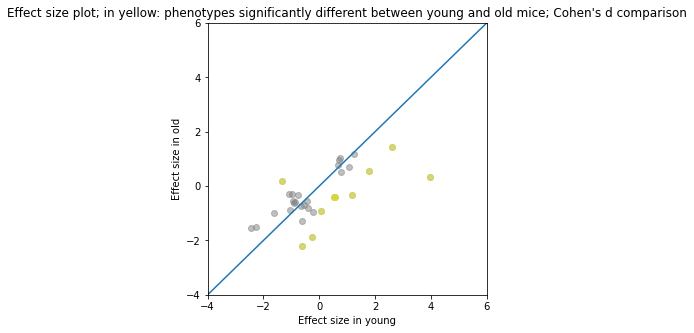

In [150]:
#scatter plot with confidence intervals of cohen's d effect sizes

fig, ax = plt.subplots(figsize=(5, 5))
ax.scatter(df['cohen.d_genotype_inYoung'], df['cohen.d_genotype_inOld'], color='grey', alpha=0.5)


# scatter plot including only the parameters with a significant difference of genotype effects
# in young and old mice (significant difference between Cohen's d effect size of genotype in young)
# vs. old mice)
ax.scatter(df.loc[(df['p_cohen.d_genotype_inOld_vs_cohen.d_genotype_inYoung'] < 0.05),'cohen.d_genotype_inYoung'],
           df.loc[(df['p_cohen.d_genotype_inOld_vs_cohen.d_genotype_inYoung'] < 0.05),'cohen.d_genotype_inOld'], 
           marker='o', color='yellow', alpha=0.35)

slope_line = np.array([-10, 10])
ax.plot(slope_line, slope_line)
ax.set_xlabel('Effect size in young')
ax.set_ylabel('Effect size in old')
ax.set_xlim([-4, 6])
ax.set_ylim([-4, 6])
ax.set_title("Effect size plot; in yellow: phenotypes significantly different between young and old mice; Cohen's d comparison")
print('Total number of parameters: ', df.shape[0], '\nParameters different between young and old: ', df[(df['p_cohen.d_genotype_inOld_vs_cohen.d_genotype_inYoung'] < 0.05)].shape[0]) 
plt.savefig('IF_effSizePlot_interventionEffOrInteractButNotAgeEff.svg')

All parameters of the 3 categories above combined

In [151]:
df_amel['type_of_phenotype'] = 'aging_phenotype_ameliorated_by_intervention'
df_acc['type_of_phenotype'] = 'aging_phenotype_accentuated_by_intervention'
df_geno['type_of_phenotype'] = 'phenotype_influenced_by_intervention_but_not_age'

df = pd.concat([df_amel, df_acc, df_geno])
df.to_csv('IF_Data_EffectSizePlots.csv')
df.sample(10)

,phenotype,mean_youngAL,ci_youngAL_upper,ci_youngAL_mean,ci_youngAL_lower,sd_youngAL,n_youngAL,mean_youngIF,ci_youngIF_upper,ci_youngIF_mean,...,cohen.d_age_inControl,ci_cohen.d_age_inControl_lower,ci_cohen.d_age_inControl_upper,z_stat_cohen.d_genotype_inOld_vs_cohen.d_genotype_inYoung,p_cohen.d_genotype_inOld_vs_cohen.d_genotype_inYoung,ci_cohen.d_genotype_inYoung_range,ci_cohen.d_genotype_inOld_range,anti_aging_greater_in,type_of_phenotype,pro_aging_greater_in
7,Glycerol_fasting,0.102438,0.111593,0.102438,0.093282,0.017181,16,0.124250,0.134669,0.124250,...,1.002172,0.296204,1.708140,-3.124294,0.001782,1.565744,1.211289,NaN,phenotype_influenced_by_intervention_but_not_age,NaN
22,Delta_RER,0.303438,0.345868,0.303438,0.261007,0.079627,16,0.359500,0.378615,0.359500,...,-0.907073,-1.665347,-0.148798,2.044903,0.040864,1.516666,1.793709,old,aging_phenotype_ameliorated_by_intervention,NaN
48,Drink_1,3.321250,3.671255,3.321250,2.971245,0.656840,16,3.731667,4.321238,3.731667,...,-1.208180,-1.993348,-0.423013,1.352204,0.176310,1.490036,1.565241,NaN,aging_phenotype_ameliorated_by_intervention,NaN
155,eu_urinate,0.687500,0.942588,0.687500,0.432412,0.478714,16,0.437500,0.710511,0.437500,...,0.450388,-0.217269,1.118045,0.598257,0.549669,1.466872,1.192383,NaN,aging_phenotype_ameliorated_by_intervention,NaN
8,ST,31.930000,33.767491,31.930000,30.092509,2.568636,10,29.688889,31.646143,29.688889,...,-0.041064,-0.955669,0.873540,3.051928,0.002274,2.029412,1.921861,old,aging_phenotype_ameliorated_by_intervention,NaN
142,NK_Ly6C,52.012500,53.855503,52.012500,50.169497,3.458685,16,57.062500,59.519751,57.062500,...,-0.362539,-1.049683,0.324604,-0.091262,0.927285,1.576574,1.355044,NaN,phenotype_influenced_by_intervention_but_not_age,NaN
19,Urea,11.200000,12.111972,11.200000,10.288028,1.711459,16,11.737500,12.785318,11.737500,...,1.214733,0.473607,1.955860,-2.154408,0.031208,1.451758,1.290538,old,aging_phenotype_ameliorated_by_intervention,NaN
21,M_Ar,114931.671200,118586.493800,114931.671200,111276.848600,6858.848952,16,121177.114900,128589.696600,121177.114900,...,2.773691,1.778940,3.768442,-2.073772,0.038101,1.862953,1.658709,old,aging_phenotype_ameliorated_by_intervention,NaN
34,Max_VO2,125.875000,130.604685,125.875000,121.145315,8.875998,16,121.500000,126.071450,121.500000,...,1.107241,0.331834,1.882649,-1.696959,0.089704,1.466603,1.612894,NaN,aging_phenotype_ameliorated_by_intervention,NaN
16,UIBC,39.693750,42.348772,39.693750,37.038728,4.982565,16,16.807143,24.946538,16.807143,...,0.701362,-0.009726,1.412450,2.385918,0.017037,1.906782,1.340378,young,aging_phenotype_ameliorated_by_intervention,NaN


Total number of parameters:  85 
Parameters different between young and old:  27


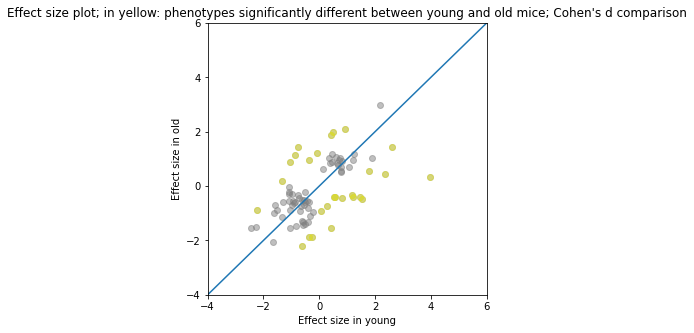

In [152]:
#scatter plot with confidence intervals of cohen's d effect sizes

fig, ax = plt.subplots(figsize=(5, 5))
ax.scatter(df['cohen.d_genotype_inYoung'], df['cohen.d_genotype_inOld'], color='grey', alpha=0.5)


# scatter plot including only the parameters with a significant difference of genotype effects
# in young and old mice (significant difference between Cohen's d effect size of genotype in young)
# vs. old mice)
ax.scatter(df.loc[(df['p_cohen.d_genotype_inOld_vs_cohen.d_genotype_inYoung'] < 0.05),'cohen.d_genotype_inYoung'],
           df.loc[(df['p_cohen.d_genotype_inOld_vs_cohen.d_genotype_inYoung'] < 0.05),'cohen.d_genotype_inOld'], 
           marker='o', color='yellow', alpha=0.35)

slope_line = np.array([-10, 10])
ax.plot(slope_line, slope_line)
ax.set_xlabel('Effect size in young')
ax.set_ylabel('Effect size in old')
ax.set_xlim([-4, 6])
ax.set_ylim([-4, 6])
ax.set_title("Effect size plot; in yellow: phenotypes significantly different between young and old mice; Cohen's d comparison")
print('Total number of parameters: ', df.shape[0], '\nParameters different between young and old: ', df[(df['p_cohen.d_genotype_inOld_vs_cohen.d_genotype_inYoung'] < 0.05)].shape[0]) 
plt.savefig('IF_effSizePlot_allCategoriesCombined.svg')